In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [174]:
data = pd.read_csv('combined_standard_batting.csv')

In [177]:
cleaned_data = data[data[' .1'] != 'League Average']
cleaned_data = cleaned_data.drop_duplicates()
cleaned_data = cleaned_data.drop(columns=list(data.filter(regex="(Rk)|( \..)| |SF")))
numeric = ['Age', 'WAR', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'Rbat+', 'rOBA', 'TB', 'GIDP', 'HBP', 'SH', 'IBB']
for col in numeric:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')
cleaned_data = cleaned_data.fillna(value=0)
cleaned_data = cleaned_data.query("PA >= 200 and OPS < 2").reset_index(drop=True)
cleaned_data = cleaned_data.rename(columns=lambda x: x.lower())
cleaned_data['player'] = cleaned_data['player'].str.lower()
cleaned_data['player'] = cleaned_data['player'].str.strip('*#')
cleaned_data['team'] = cleaned_data['team'].str.lower()
cleaned_data['team'] = cleaned_data['team'].str.replace('2tm', 'multiple')
cleaned_data['lg'] = cleaned_data['lg'].str.lower()
cleaned_data['lg'] = cleaned_data['lg'].str.replace('2lg', 'both')
cleaned_data

,player,age,team,lg,war,g,pa,ab,r,h,...,ops+,roba,rbat+,tb,gidp,hbp,sh,ibb,pos,awards
0,ralph kiner,24.0,pit,nl,8.1,152.0,666.0,565.0,118.0,177.0,...,173.0,0.456,177.0,361.0,12.0,2.0,1.0,8.0,*7/H,MVP-6
1,johnny mize,34.0,nyg,nl,7.5,154.0,664.0,586.0,137.0,177.0,...,160.0,0.438,164.0,360.0,6.0,4.0,0.0,7.0,*3,"AS,MVP-3"
2,willard marshall,26.0,nyg,nl,5.3,155.0,656.0,587.0,102.0,171.0,...,134.0,0.392,136.0,310.0,14.0,2.0,0.0,12.0,*9,"AS,MVP-16"
3,walker cooper,32.0,nyg,nl,4.7,140.0,547.0,515.0,79.0,157.0,...,141.0,0.407,143.0,302.0,13.0,3.0,4.0,3.0,*2/H,"AS,MVP-18"
4,ted williams,28.0,bos,al,9.5,156.0,693.0,528.0,125.0,181.0,...,205.0,0.504,212.0,335.0,10.0,2.0,1.0,29.0,*7,"AS,MVP-2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23003,travis jankowski,32.0,tex,al,1.4,107.0,287.0,247.0,34.0,65.0,...,93.0,0.332,96.0,82.0,6.0,2.0,1.0,0.0,7H98/D,
23004,nicky lopez,28.0,multiple,both,1.8,93.0,262.0,225.0,32.0,52.0,...,75.0,0.292,77.0,69.0,3.0,6.0,4.0,0.0,456H/317D,
23005,reese mcguire,28.0,bos,al,-0.3,72.0,206.0,187.0,15.0,50.0,...,80.0,0.295,76.0,67.0,2.0,1.0,2.0,0.0,2H/D,
23006,rob refsnyder,32.0,bos,al,0.4,89.0,243.0,202.0,31.0,50.0,...,87.0,0.327,98.0,64.0,8.0,5.0,1.0,0.0,7H8/D9,


Some possible questions:

1. Is there a positive correlation between batting average and wins above replacement?
2. Do players with more plate appearances per game generally perform better in most metrics?

<Axes: xlabel='ba', ylabel='war'>

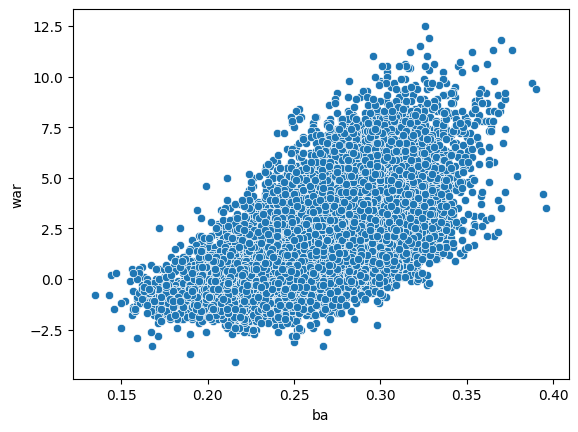

In [181]:
# plot the relationship between batting average and wins above replacement
sns.scatterplot(data=cleaned_data, x='ba', y='war')